In [1]:
import pandas as pd

In [2]:
fPath = 'Walmart_Sales.csv'
df = pd.read_csv(fPath)

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

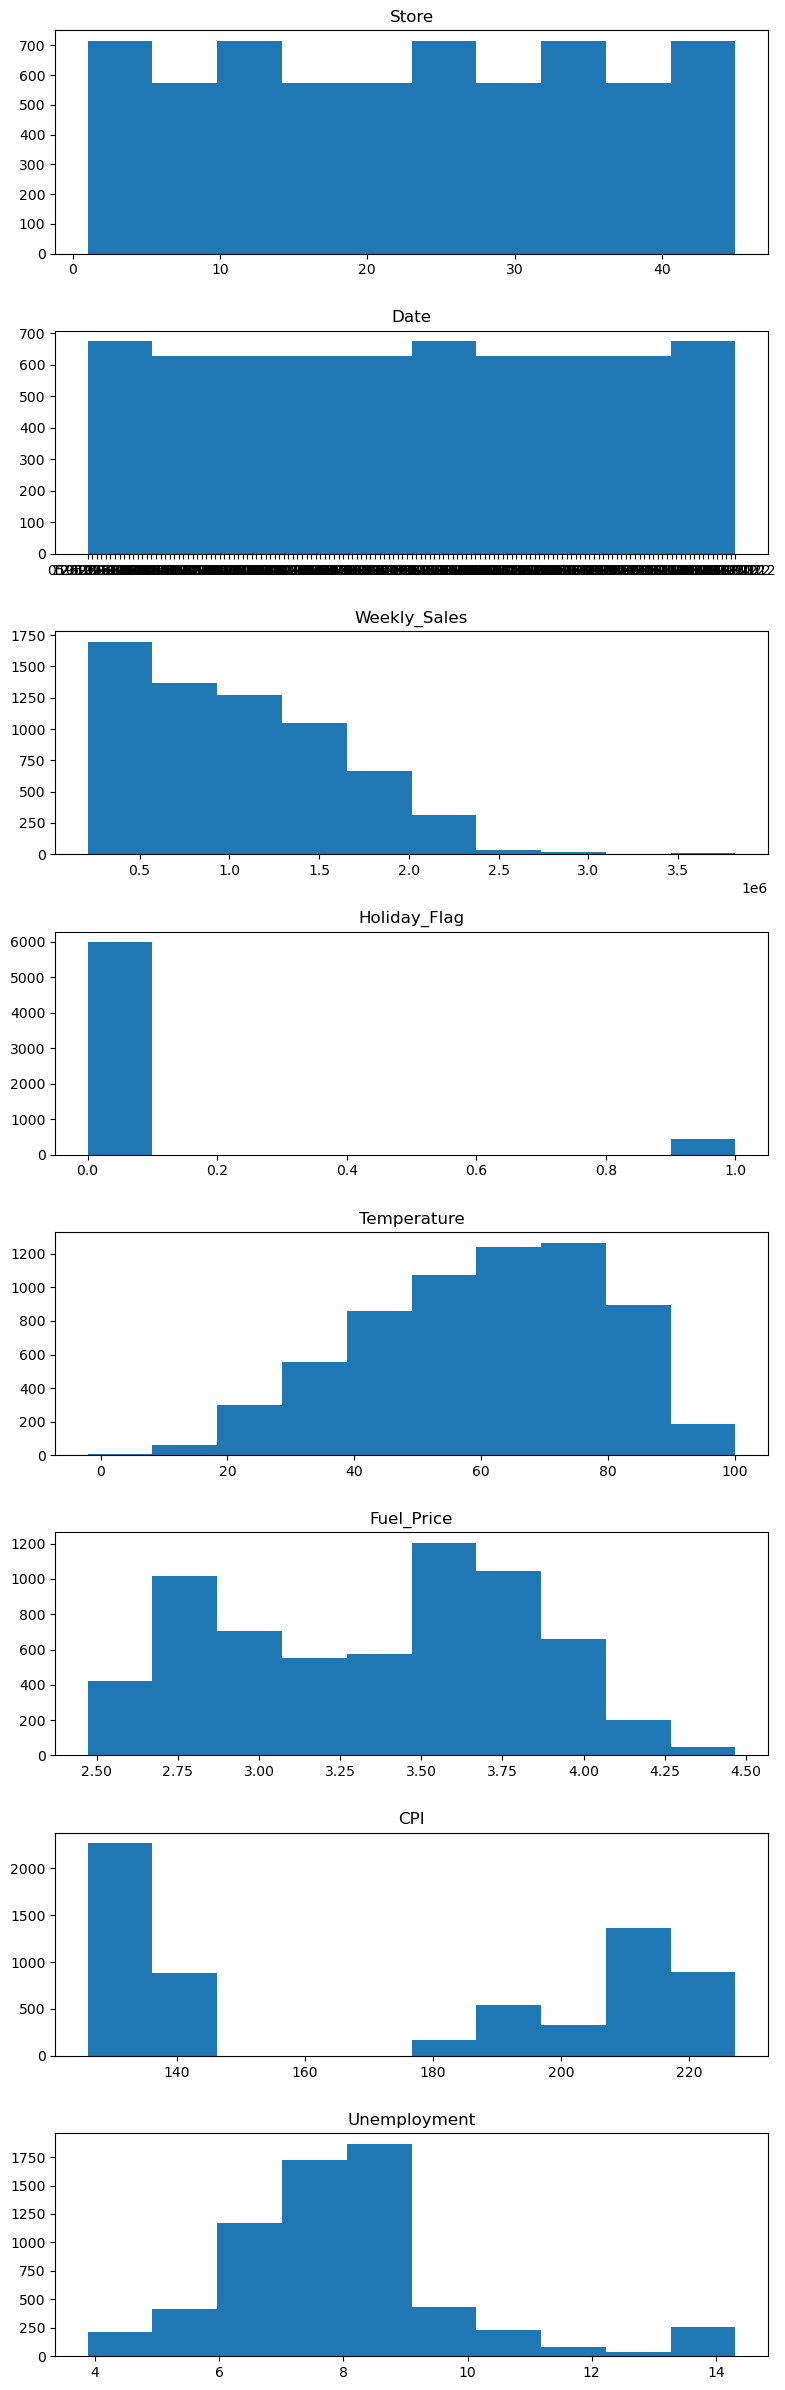

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(df.columns), 1, figsize=(8, len(df.columns) * 3))

for idx,ax in enumerate(axes):
    ax.hist(df[df.columns[idx]])  # oppure con iloc[:,idx]
    ax.set_title(df.columns[idx])

plt.tight_layout()
plt.show()

In [3]:
# cambiare da fahreneit a celsius

print(df['Temperature'])
df['Temperature'] = round(((df['Temperature'] - 32) * 5/9), 2)
print(df['Temperature'])

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64
0        5.73
1        3.62
2        4.41
3        8.13
4        8.06
        ...  
6430    18.27
6431    18.27
6432    12.48
6433    13.59
6434    14.92
Name: Temperature, Length: 6435, dtype: float64


In [36]:
holidayCount = df['Holiday_Flag'].value_counts()
print(holidayCount[0])

5985


([<matplotlib.patches.Wedge at 0x230f9d69a90>,
 [Text(-1.073561123911563, 0.23972174124543214, '0'),
  Text(1.0735611183004703, -0.23972176637394407, '1')],
 [Text(-0.5855787948608525, 0.13075731340659932, '93.0%'),
  Text(0.5855787918002564, -0.13075732711306037, '7.0%')])

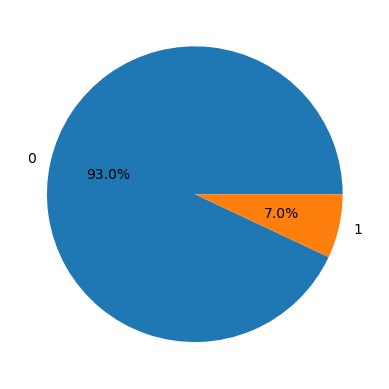

In [38]:
plt.pie([holidayCount[0],holidayCount[1]], labels=['0','1'], autopct='%1.1f%%')

In [46]:
# analisi correlazione

df.drop(columns='Date').corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022656,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063811,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155096,-0.078347,-0.002162,0.010960
Temperature,-2.265637e-02,-0.063811,-1.550958e-01,1.000000,0.144982,0.176883,0.101162
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176883,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101162,-0.034684,-0.302020,1.000000


In [47]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\matti\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


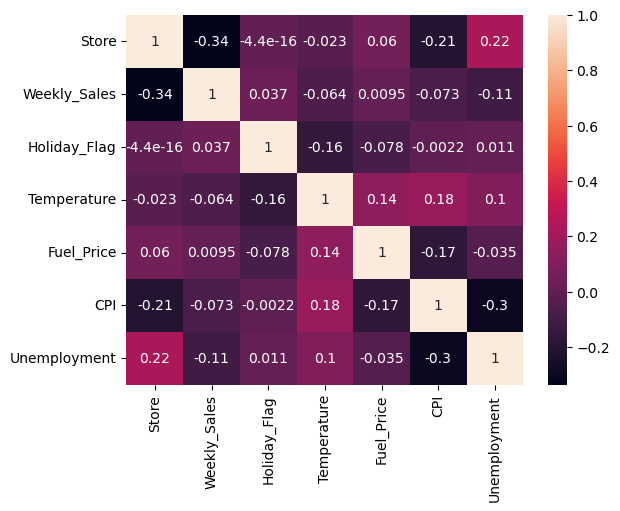

In [5]:
import seaborn as sb

dataPlot = sb.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

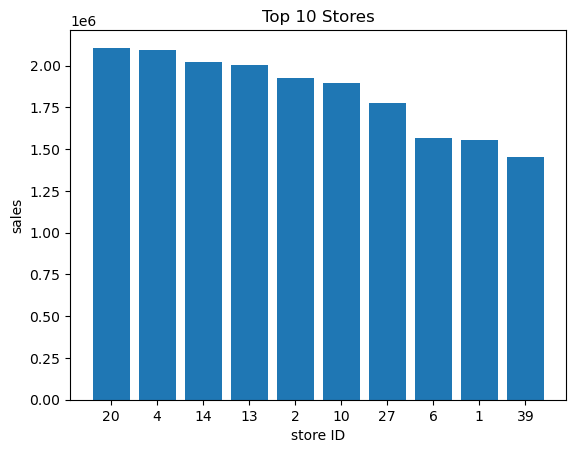

In [ ]:
# store dove si vende di più

top_stores = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)[:10]

plt.bar(top_stores.index.astype(str), top_stores.values)  # Converti gli ID in stringhe per l'asse x
plt.title('Top 10 Stores')
plt.xlabel('store ID')
plt.ylabel('sales')
plt.show()

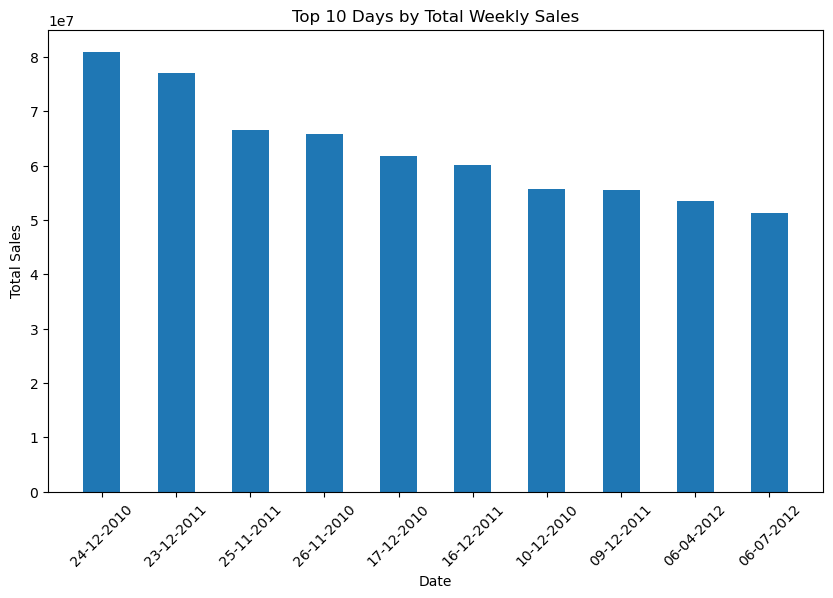

In [105]:
# giorni con più vendite

topDays = df.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.bar(x=topDays.index, height=topDays.values, width=0.5)
plt.title('Top 10 Days by Total Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


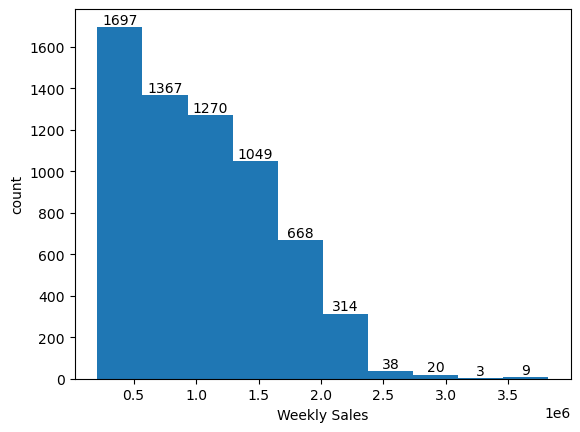

In [ ]:
counts, _, patches = plt.hist(df['Weekly_Sales'], bins=10)

for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom')

plt.xlabel('Weekly Sales')
plt.ylabel('count')
plt.show()


In [14]:
df['Weekly_Sales'].nlargest(2)

1905    3818686.45
2763    3766687.43
Name: Weekly_Sales, dtype: float64

In [18]:
newDf = df.sort_values(by='Weekly_Sales', ascending= False)
newDf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795


In [ ]:
newDf['Date'][:5]  # le date con più vendite sono sotto Natale, giustamente

1905    24-12-2010
2763    24-12-2010
1333    24-12-2010
527     23-12-2011
1762    24-12-2010
Name: Date, dtype: object

In [22]:
# vendite medie per temperatura

df.groupby(by='Temperature')['Weekly_Sales'].mean()


Temperature
-18.92    5.580278e+05
-14.70    8.174851e+05
-14.32    1.083071e+06
-13.63    5.938755e+05
-12.49    7.759104e+05
              ...     
 37.33    2.391984e+05
 37.34    8.155418e+05
 37.59    2.370958e+05
 37.82    2.977535e+05
 37.86    2.809378e+05
Name: Weekly_Sales, Length: 2756, dtype: float64

In [26]:
df['Temperature'].nsmallest(10)

910    -18.92
3626   -14.70
2336   -14.32
959    -13.63
5628   -12.49
3575   -12.47
906    -12.17
909    -12.16
911    -12.09
858    -11.93
Name: Temperature, dtype: float64

In [27]:
df['Temperature'].dtype

dtype('float64')

In [ ]:
df[df['Temperature']==-18.92]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
910,7,04-02-2011,558027.77,0,-18.92,3.011,191.762589,8.818


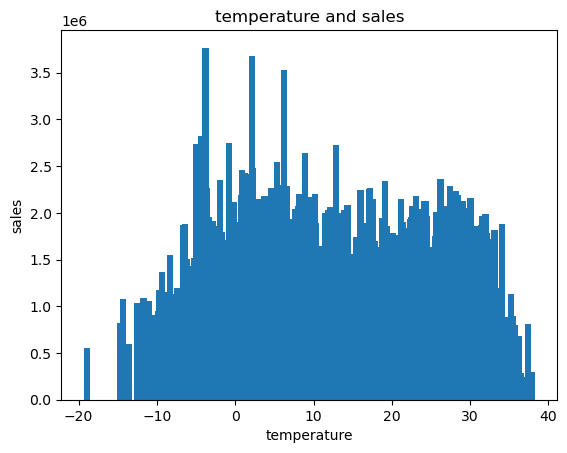

In [34]:
temperatureSales = df.groupby('Temperature')['Weekly_Sales'].mean()
plt.bar(x=temperatureSales.index, height=temperatureSales.values)
plt.title('temperature and sales')
plt.xlabel('temperature')
plt.ylabel('sales')
plt.show()

In [38]:
# vendite a settimana

print(f'number of rows: {len(df)}')

number of rows: 6435


In [ ]:
import numpy as np

print(len(np.unique(np.array(df['Date']))))

# quindi ho 6435 righe e 143 valori unici di date


143


In [ ]:
# istogramma per date più rappresentate

dateCounts = df['Date'].value_counts().sort_values(ascending=False)

#plt.bar(x=dateCounts.index, height=dateCounts.values)  # illegibile
print(dateCounts[:5])
print(dateCounts[-5:])  # --> infatti 6435 / 143 = 45

Date
05-02-2010    45
09-04-2010    45
19-02-2010    45
26-02-2010    45
05-03-2010    45
Name: count, dtype: int64
Date
28-09-2012    45
05-10-2012    45
12-10-2012    45
19-10-2012    45
26-10-2012    45
Name: count, dtype: int64


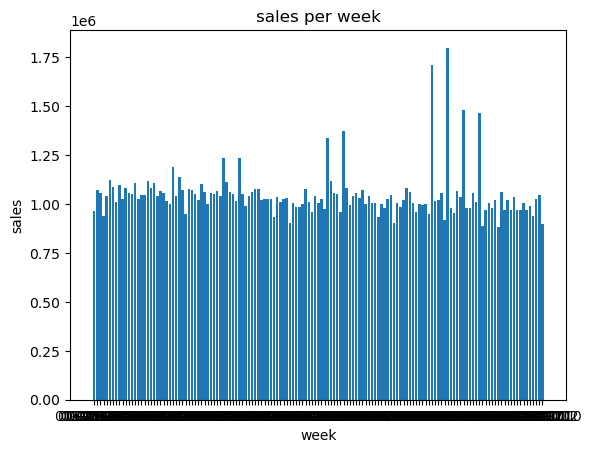

In [ ]:

weeklySales = df.groupby('Date')['Weekly_Sales'].mean()
plt.bar(x=weeklySales.index, height=weeklySales.values)
plt.xlabel('week')
plt.ylabel('sales')
plt.title('sales per week')
plt.show()

Text(0.5, 0, "Index([0, 1], dtype='int64', name='Holiday_Flag')")

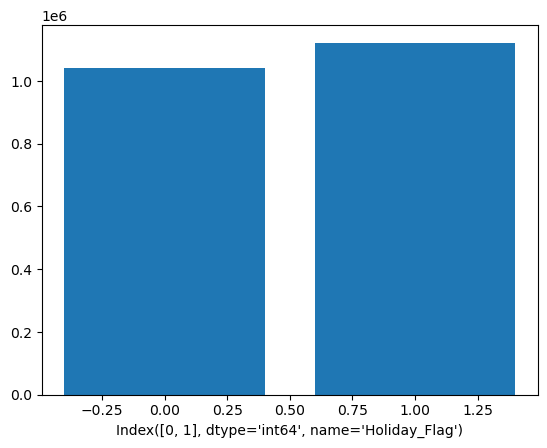

In [51]:
tmp = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.bar(x=tmp.index,height=tmp.values)
plt.xlabel(tmp.index)

# CLUSTERING

In [52]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

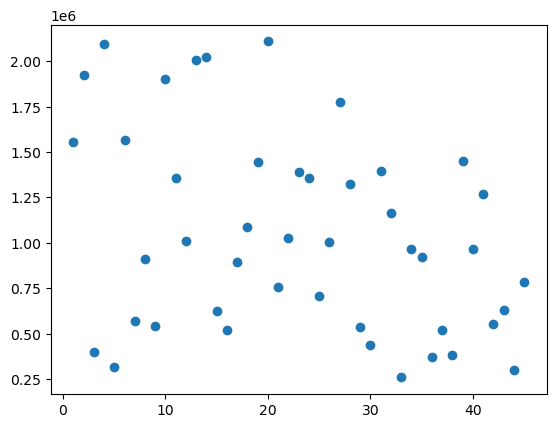

In [54]:
meanSoldPerStore = df.groupby('Store')['Weekly_Sales'].mean()
plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values)

c:\Users\matti\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\matti\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


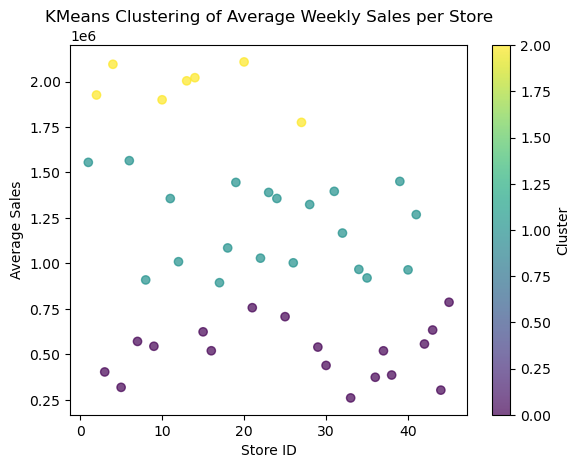

In [59]:
from sklearn.cluster import KMeans

data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('KMeans Clustering of Average Weekly Sales per Store')
plt.xlabel('Store ID')
plt.ylabel('Average Sales')
plt.colorbar(label='Cluster')
plt.show()


In [60]:
!pip show yellowbrick

Name: yellowbrick
Version: 1.5
Summary: A suite of visual analysis and diagnostic tools for machine learning.
Home-page: http://scikit-yb.org/
Author: The scikit-yb developers
Author-email: yellowbrick@googlegroups.com
License: Apache 2
Location: C:\Users\matti\anaconda3\Lib\site-packages
Requires: cycler, matplotlib, numpy, scikit-learn, scipy
Required-by: 


c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

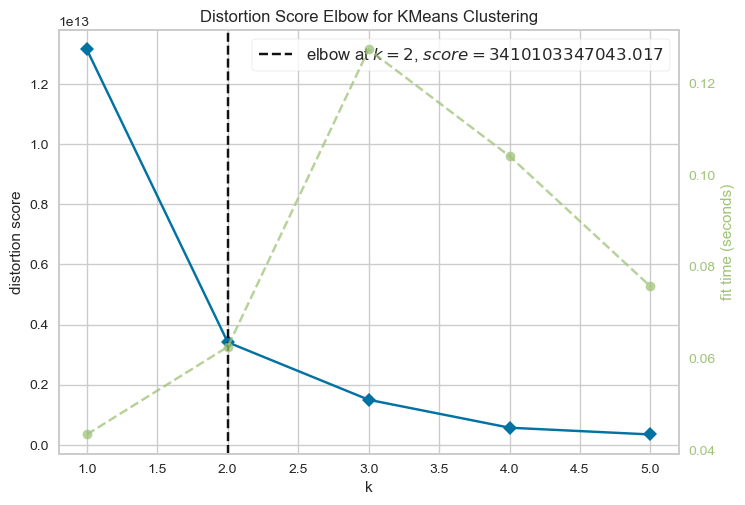

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6))
data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


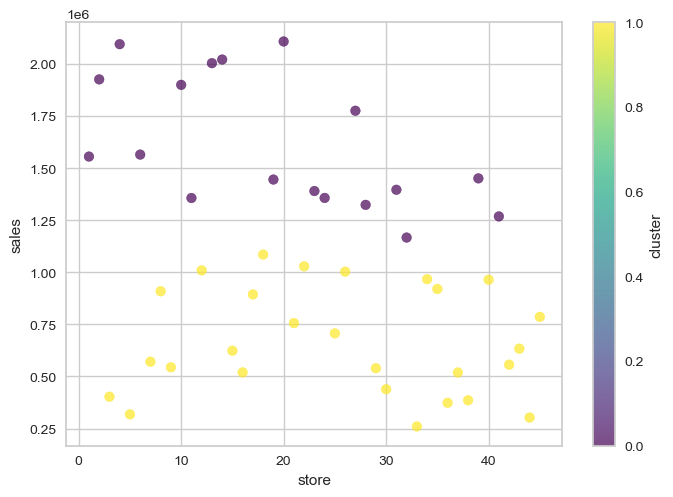

In [65]:
data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans
kmeans = KMeans(n_clusters=2).fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()


c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


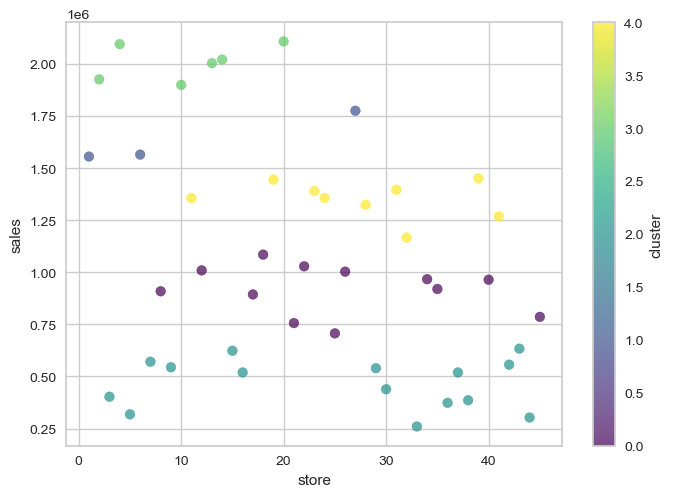

In [ ]:
# wrong example

data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans
kmeans = KMeans(n_clusters=5).fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

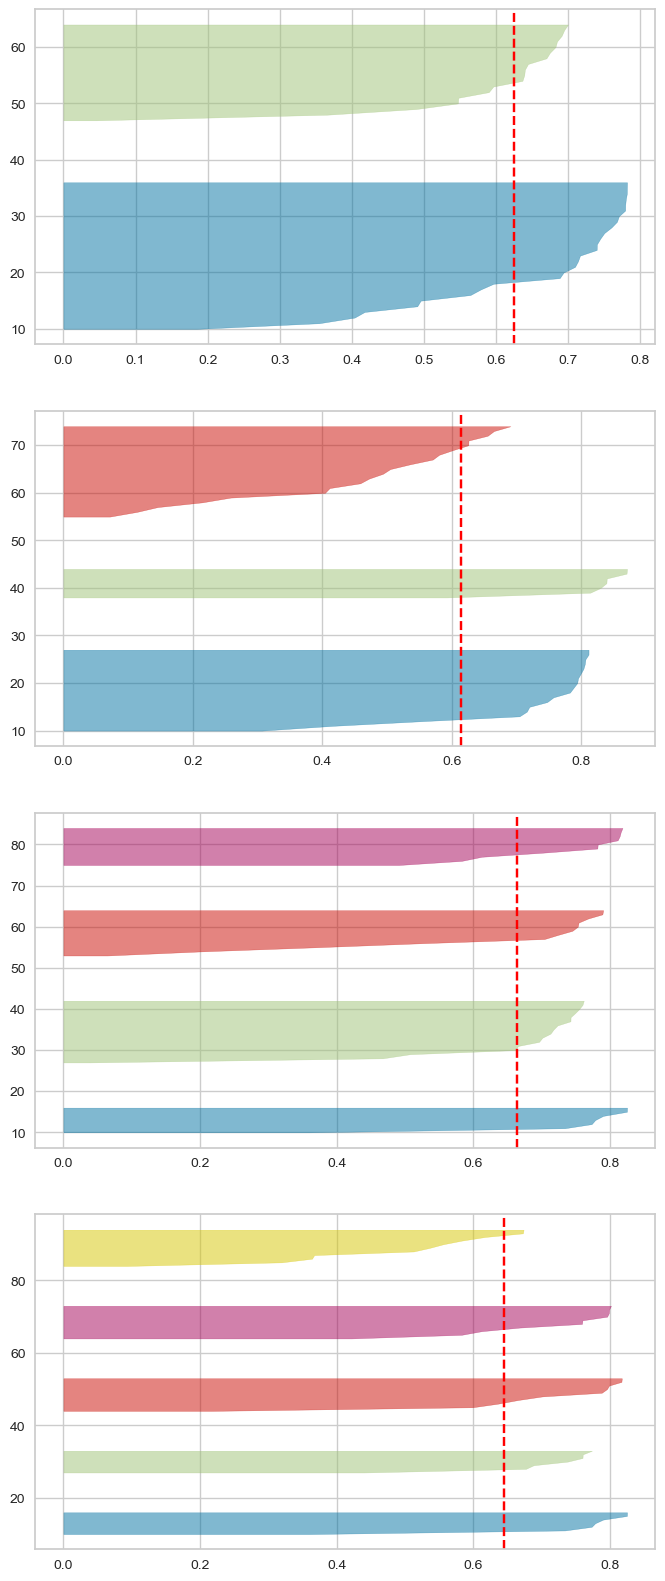

In [72]:
# silhouette analysis

from yellowbrick.cluster import SilhouetteVisualizer

fig,axes = plt.subplots(4,1, figsize=(8,20))

for i in range(2,6):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, ax=axes[i - 2], colors='yellowbrick')
    
    visualizer.fit(data)        # Fit the data to the visualizer
plt.show()

c:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


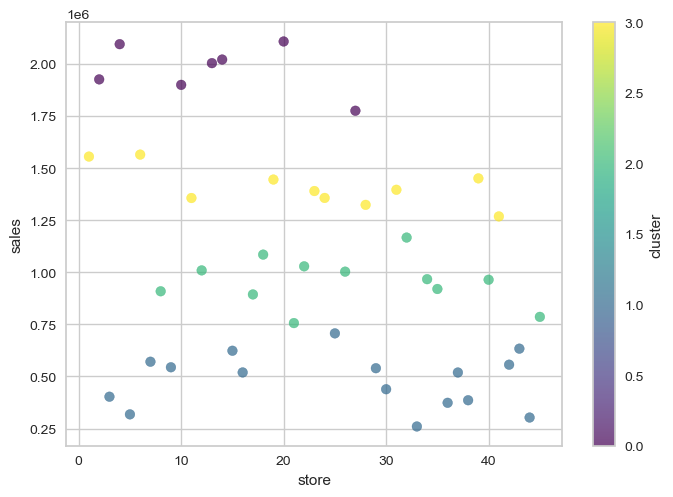

In [73]:
# vista la silhouette, cerco 4 clusters

data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans
kmeans = KMeans(n_clusters=4).fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

## DBSCAN

### Epsilon estimation

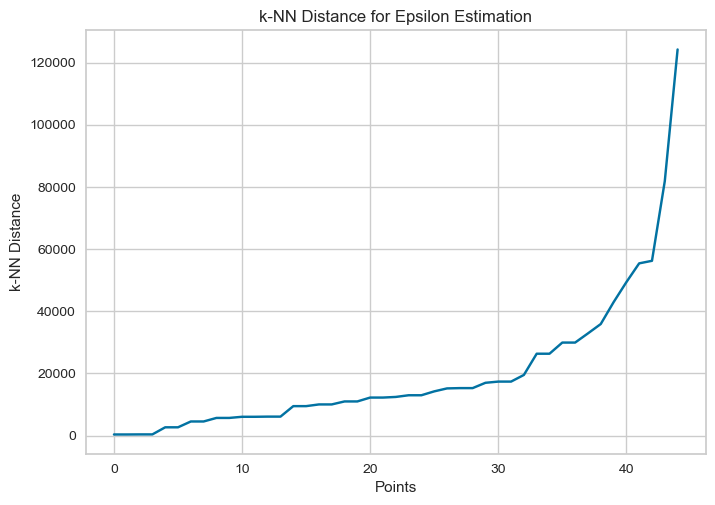

In [116]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nearest = NearestNeighbors(n_neighbors=2)
nearest.fit(data)
distances, _ = nearest.kneighbors(data)

# Ordina le distanze dei vicini più vicini
sorted_distances = np.sort(distances[:, -1])

# Plot per trovare l'"elbow"
plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel('k-NN Distance')
plt.title('k-NN Distance for Epsilon Estimation')
plt.show()

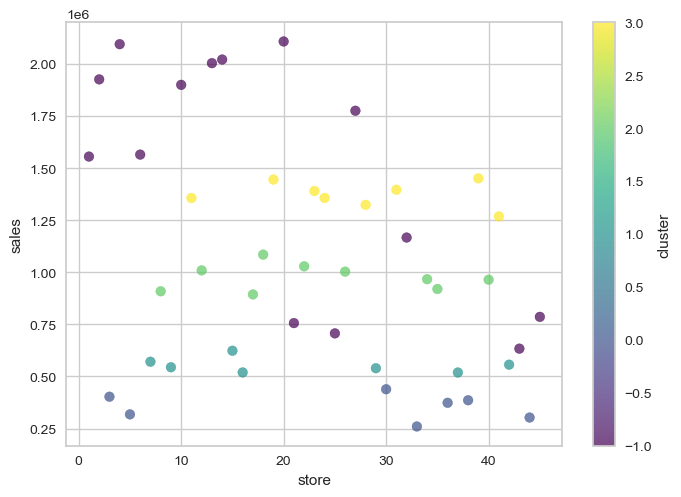

In [ ]:
from sklearn.cluster import DBSCAN

data = meanSoldPerStore.values.reshape(-1, 1)  # Reshape per KMeans

model = DBSCAN(eps=60000, min_samples=4)  # con 20k detecta tutto rumore
db = model.fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=model.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

In [128]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 41


In [87]:
# normalizzo

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.06,2.625,211.350143,8.106


In [89]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [92]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.06,2.625,211.350143,8.106


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalizedDf = df

normalizedDf['Weekly_Sales'] = scaler.fit_transform(normalizedDf[['Weekly_Sales']])

normalizedDf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0.397291,0,5.73,2.572,211.096358,8.106
1,1,12-02-2010,0.396811,1,3.62,2.548,211.242170,8.106
2,1,19-02-2010,0.388501,0,4.41,2.514,211.289143,8.106
3,1,26-02-2010,0.332458,0,8.13,2.561,211.319643,8.106
4,1,05-03-2010,0.372661,0,8.06,2.625,211.350143,8.106


In [102]:
normalizedMeanSold = normalizedDf.groupby('Store')['Weekly_Sales'].mean()
normData = normalizedMeanSold.values.reshape(-1, 1)

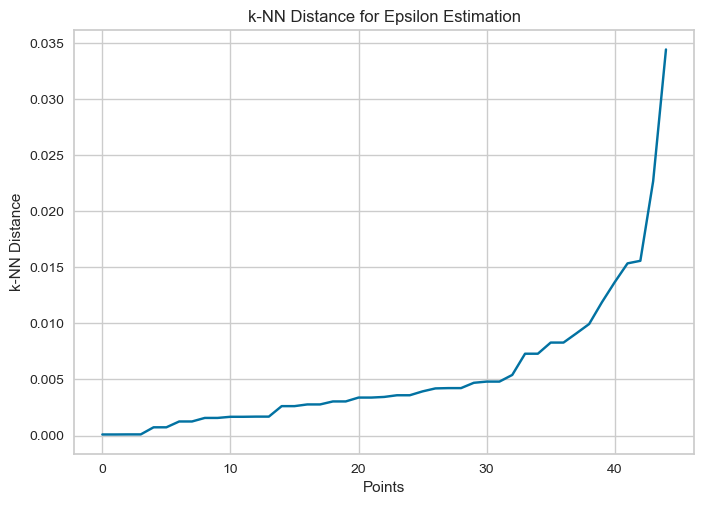

In [103]:
nearest = NearestNeighbors(n_neighbors=2)
nearest.fit(normData)
distances, _ = nearest.kneighbors(normData)

# Ordina le distanze dei vicini più vicini
sorted_distances = np.sort(distances[:, -1])

# Plot per trovare l'"elbow"
plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel('k-NN Distance')
plt.title('k-NN Distance for Epsilon Estimation')
plt.show()

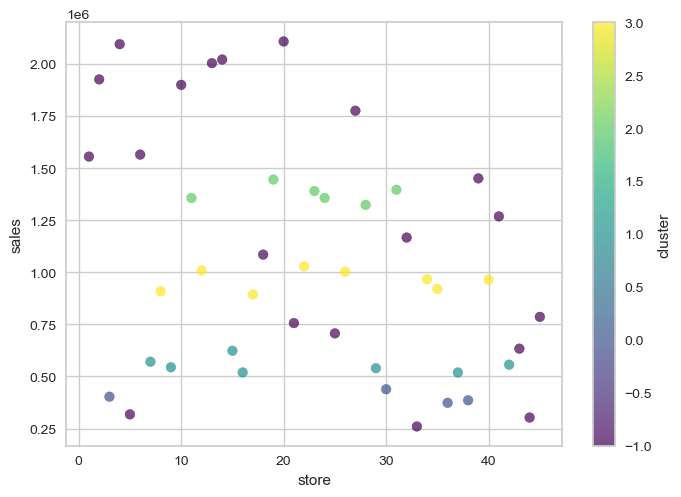

In [124]:
data = normalizedMeanSold.values.reshape(-1, 1)  # Reshape per KMeans

model = DBSCAN(eps=0.015, min_samples=4)
model.fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=model.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

## Mean Shift

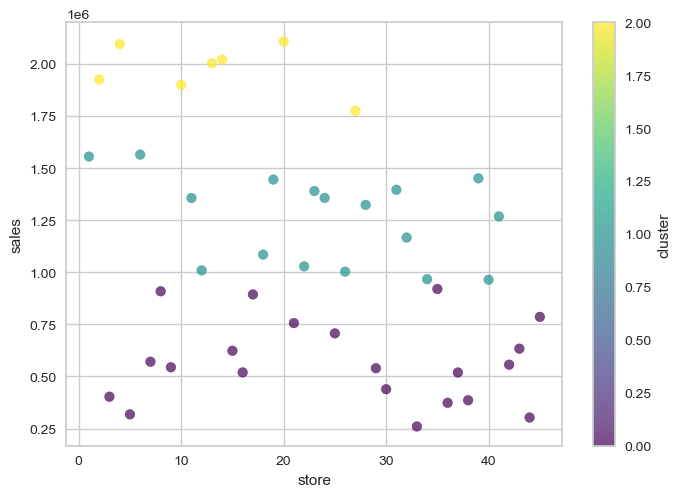

In [ ]:
from sklearn.cluster import MeanShift
model = MeanShift()  # set bandwidth ?
model.fit(data)

plt.scatter(meanSoldPerStore.index, meanSoldPerStore.values, c=model.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

## PCA

In [144]:
df.drop(columns=['Date']).head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


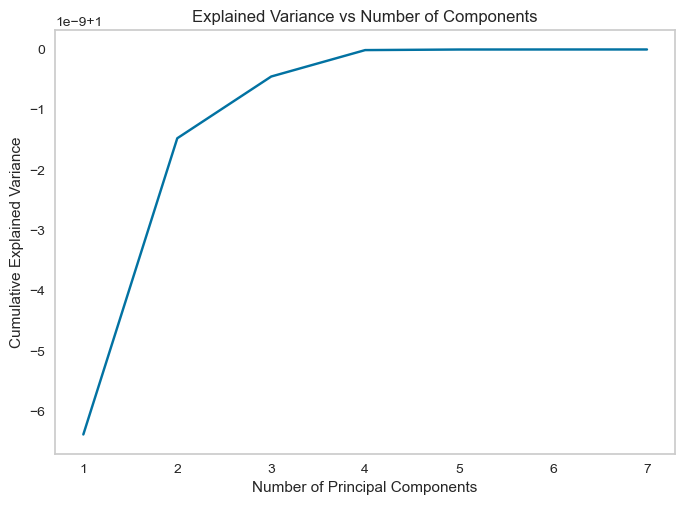

In [146]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop(columns=['Date']))

# Plot della varianza spiegata cumulativa
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df.drop(columns=['Date']))
print(pca.explained_variance_ratio_)

[9.99999994e-01 4.91089495e-09]


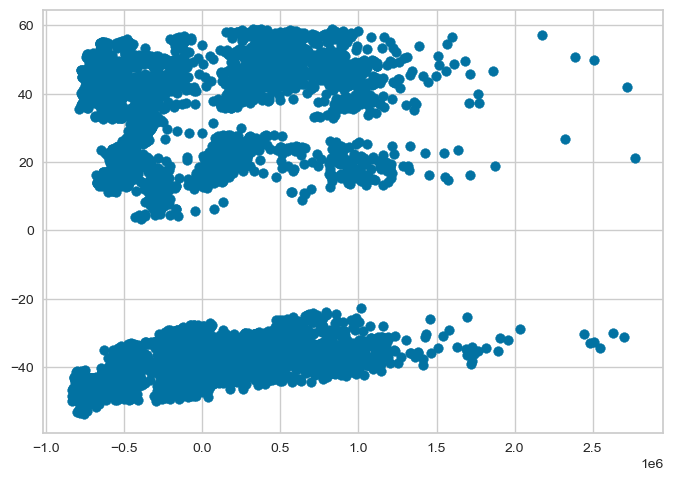

In [155]:
plt.scatter(reduced[:,0],reduced[:,1])

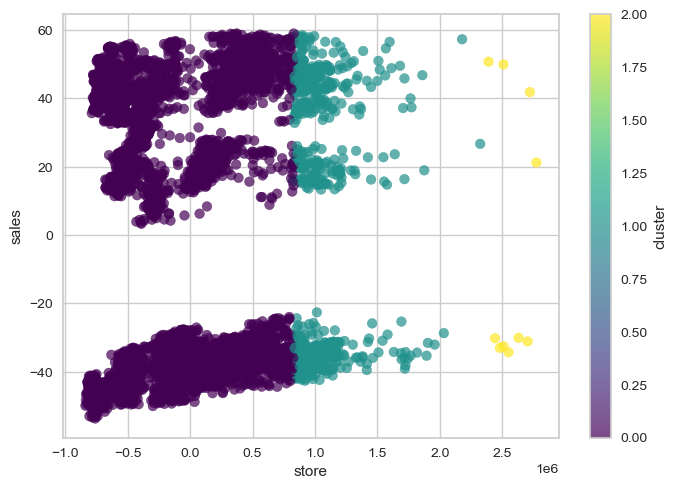

In [158]:
from sklearn.cluster import MeanShift
model = MeanShift()  # set bandwidth
model.fit(reduced)

plt.scatter(reduced[:,0], reduced[:,1], c=model.labels_, cmap='viridis', alpha=0.7)
plt.xlabel('store')
plt.ylabel('sales')
plt.colorbar(label='cluster')
plt.show()

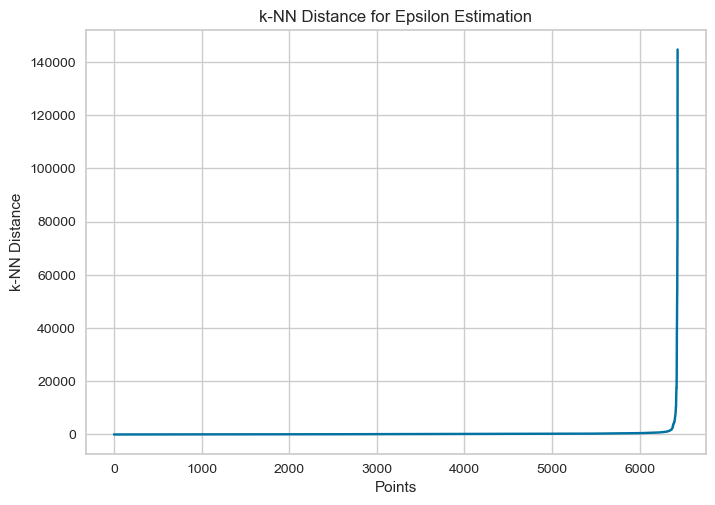

In [160]:
nearest = NearestNeighbors(n_neighbors=2)
nearest.fit(reduced)
distances, _ = nearest.kneighbors(reduced)

# Ordina le distanze dei vicini più vicini
sorted_distances = np.sort(distances[:, -1])

# Plot per trovare l'"elbow"
plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel('k-NN Distance')
plt.title('k-NN Distance for Epsilon Estimation')
plt.show()

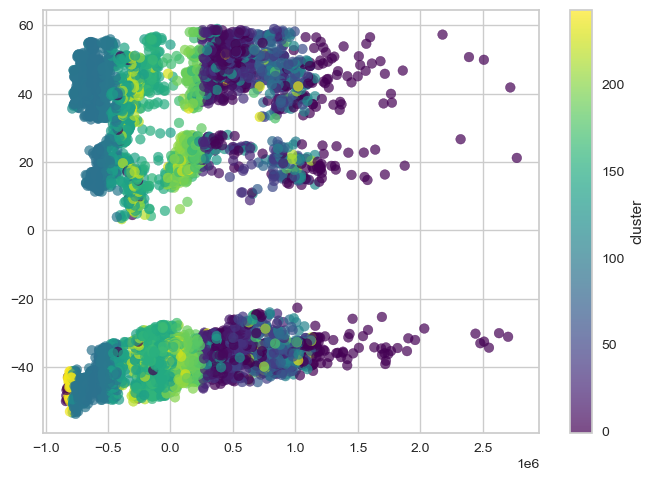

In [161]:
model = DBSCAN(eps=1000, min_samples=4)
model.fit(reduced)

plt.scatter(reduced[:,0], reduced[:,1], c=model.labels_, cmap='viridis', alpha=0.7)
plt.colorbar(label='cluster')
plt.show()

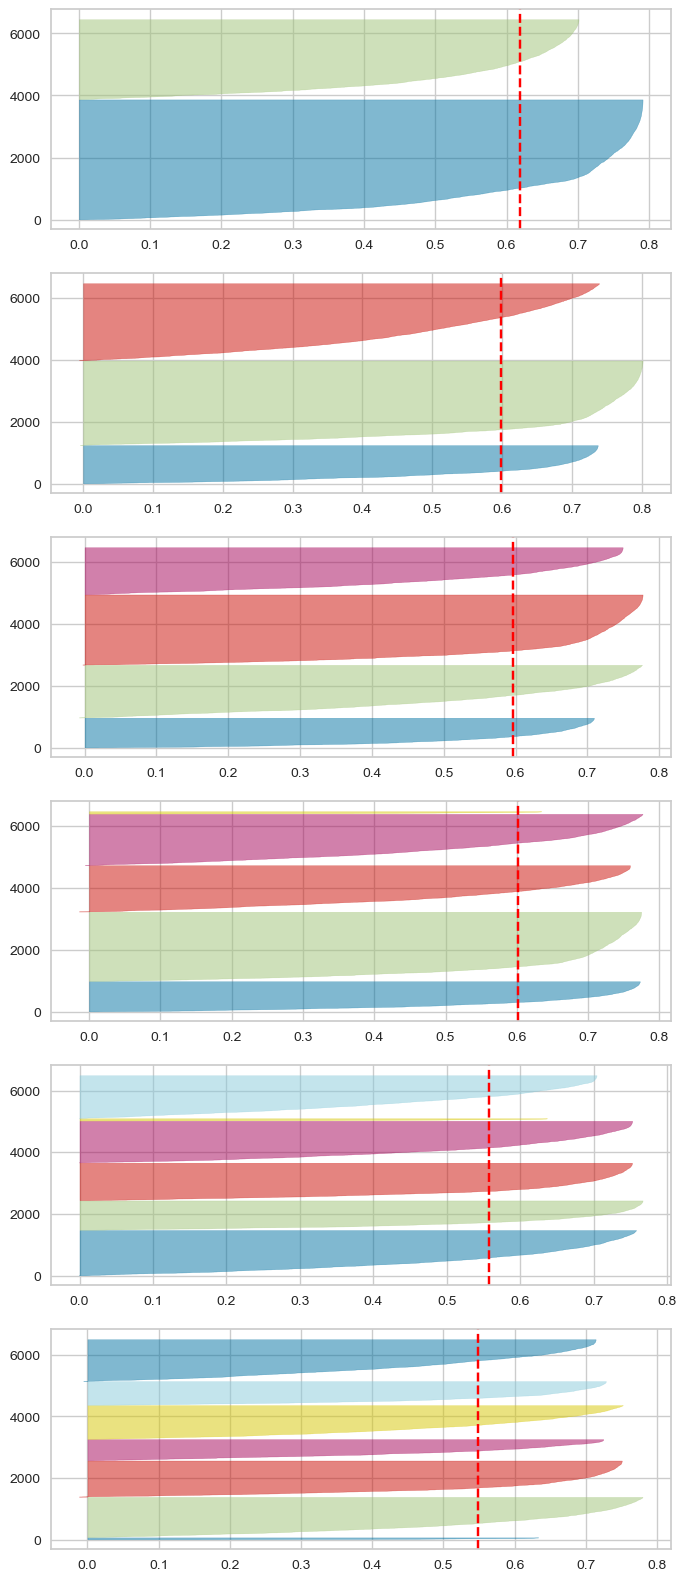

In [162]:
# silhouette analysis

from yellowbrick.cluster import SilhouetteVisualizer

fig,axes = plt.subplots(6,1, figsize=(8,20))

for i in range(2,8):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, ax=axes[i - 2], colors='yellowbrick')
    
    visualizer.fit(reduced)        # Fit the data to the visualizer
plt.show()

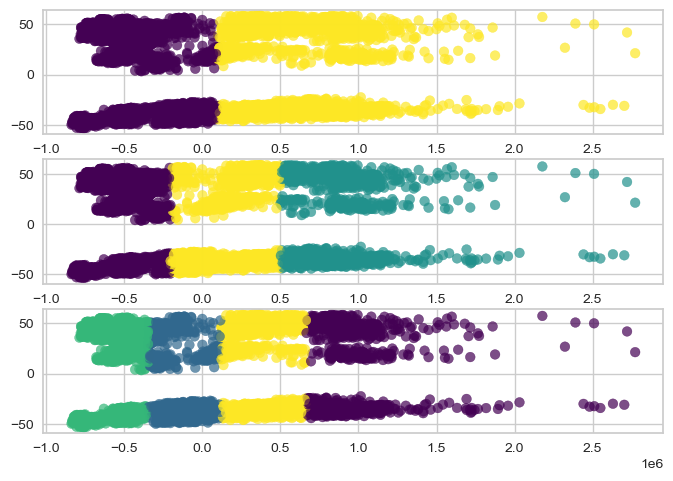

In [165]:
_, axes = plt.subplots(3,1)
for i in range(3):
    model = KMeans(n_clusters=i+2)
    model.fit(reduced)

    axes[i].scatter(reduced[:,0], reduced[:,1], c=model.labels_, cmap='viridis', alpha=0.7)
    #axes[i].colorbar(label='cluster')
plt.show()

In [4]:
import pandas as pd
from sklearn.decomposition import PCA

redDf = df.drop(columns='Date')
pca = PCA(n_components=2)
pca.fit(redDf)
loadings = pd.DataFrame(pca.components_, columns=redDf.columns, index=['PC1', 'PC2'])
print(loadings)


        Store  Weekly_Sales  Holiday_Flag  Temperature    Fuel_Price  \
PC1 -0.000008      1.000000  1.667179e-08    -0.000001  7.697238e-09   
PC2 -0.084916      0.000004 -1.129431e-05     0.047995 -1.964674e-03   

          CPI  Unemployment  
PC1 -0.000005 -3.529162e-07  
PC2  0.995119 -1.486409e-02  


In [ ]:
# la PC1 spiega il 99% della varianza perché è su una scala diversa --> va normalizzata

In [174]:
redDf = df.drop(columns='Date')
redDf.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
# vedo le distribuzioni per capire dove usare standard e dove minmax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

redDf = scaler.fit_transform(redDf)

redDf = pd.DataFrame(data=redDf,columns=df.drop(columns='Date').columns)
redDf.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0.0,0.397291,0.0,0.434132,0.050100,0.840500,0.405118
1,0.0,0.396811,1.0,0.396971,0.038076,0.841941,0.405118
2,0.0,0.388501,0.0,0.410884,0.021042,0.842405,0.405118
3,0.0,0.332458,0.0,0.476400,0.044589,0.842707,0.405118
4,0.0,0.372661,0.0,0.475167,0.076653,0.843008,0.405118


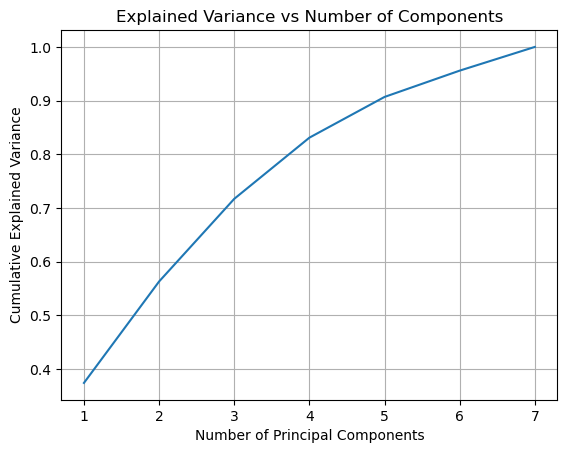

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(redDf)

# Plot della varianza spiegata cumulativa
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


In [10]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(redDf)
print(pca.explained_variance_ratio_)

[0.37366425 0.18908516]


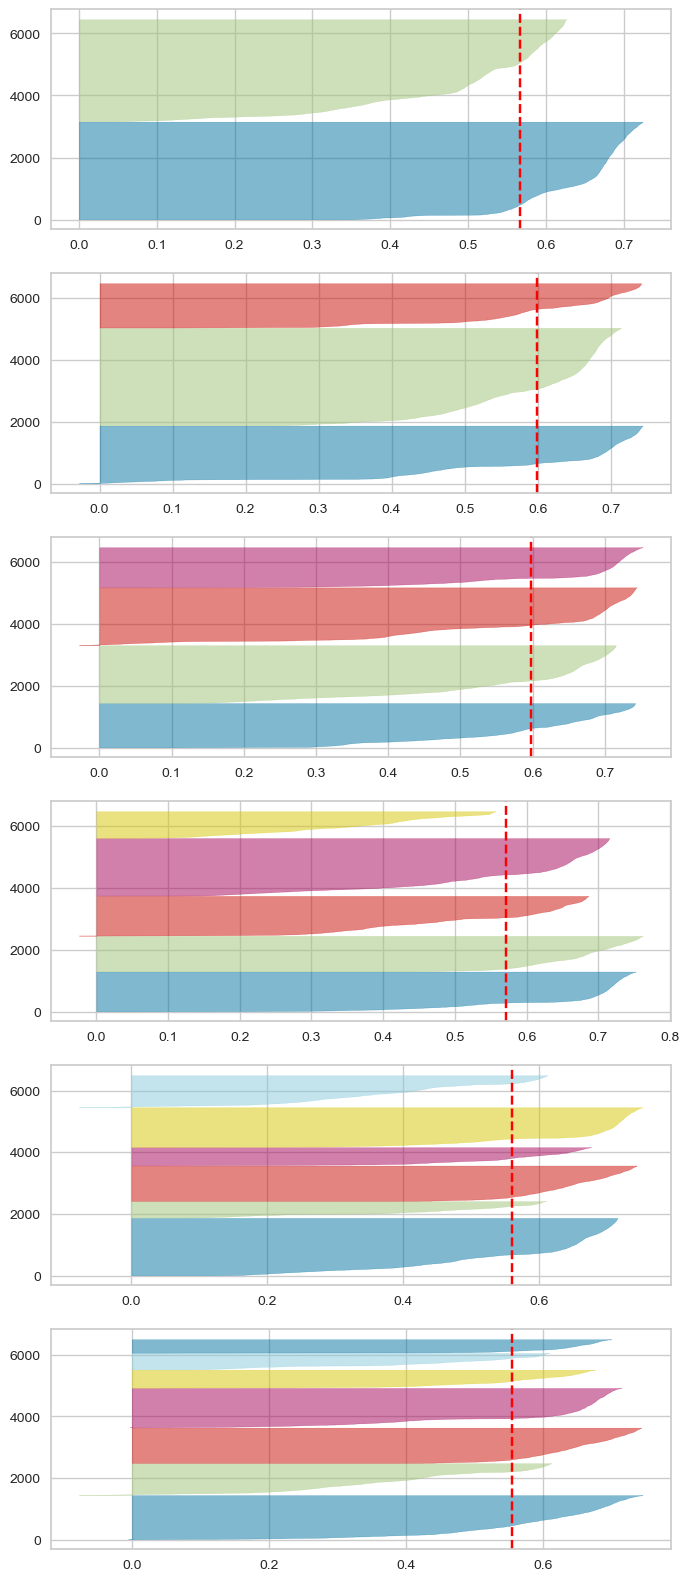

In [181]:
# silhouette analysis

from yellowbrick.cluster import SilhouetteVisualizer

fig,axes = plt.subplots(6,1, figsize=(8,20))

for i in range(2,8):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, ax=axes[i - 2], colors='yellowbrick')
    
    visualizer.fit(reduced)        # Fit the data to the visualizer
plt.show()

c:\Users\matti\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\matti\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


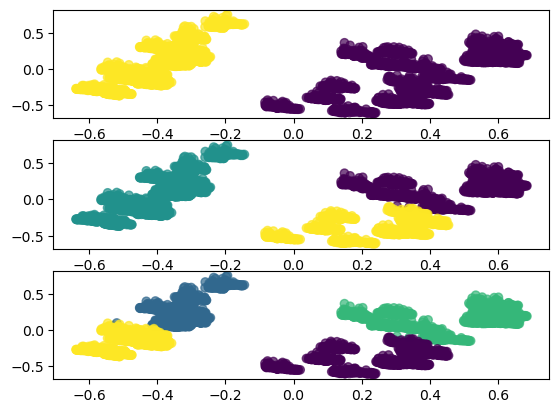

In [12]:
from sklearn.cluster import KMeans

_, axes = plt.subplots(3,1)
for i in range(3):
    model = KMeans(n_clusters=i+2)
    model.fit(reduced)

    axes[i].scatter(reduced[:,0], reduced[:,1], c=model.labels_, cmap='viridis', alpha=0.7)
plt.show()

# EXTRA

In [ ]:
df.isna().sum()  # check missing values

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')  # convert to pandas datetime format
df.dtypes

In [ ]:
duplicate_values=df.duplicated().sum()  # check for duplicate values
print(f'The data contains {duplicate_values} duplicate values')